In [1]:
print('In this scenario, I was given classified data from a company who is asking me to analyze and classify the data.')

In this scenario, I was given classified data from a company who is asking me to analyze and classify the data.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
classified_data = pd.read_csv(r"C:\Users\camwa\OneDrive\Datasets\Classified Data", index_col = 0)

In [5]:
classified_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
#Because the KNN classifier predicts the class of a given test observation by identifying the objects that are nearest to it, the scale of the variable actually matters a lot. Any variables that are on a larger scale will have a much larger effect on the distance between observations. Therefore when using KNN as a classifier, we need to standardize everything to the same scale. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fitting the scaler to the data 
scaler.fit(classified_data.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [7]:
#Now I am going to use the scaler object to do a transformation. 
scaled_features = scaler.transform(classified_data.drop('TARGET CLASS', axis=1))

In [8]:
#Let's look at the scaled values 
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
#I am now going to use the scaled_features array to recreate a features data frame
df_feat = pd.DataFrame(scaled_features, columns = classified_data.columns[:-1])

In [10]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
#The data is ready to be trained, tested, and split.
from sklearn.model_selection import train_test_split

In [12]:
X = df_feat
y = classified_data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
#Now I'm ready to employ the K Nearest Neighbors algorithm for analysis.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
predictions = knn.predict(X_test)

In [16]:
#Time to do a prediction and evaluation based off of the KNN model
from sklearn.metrics import classification_report, confusion_matrix 

In [17]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [19]:
#It seems that 1 is a good K value, but there may be another K value that improves the model. To make sure I am selecting the correct k value, I am going to utilize the elbow method. 
error_rate = []

for i in range(1, 40): #checking every possible k value between 1 and 40
    knn = KNeighborsClassifier(n_neighbors = i) #creating a KNN model for each specific value
    knn.fit(X_train, y_train) #fitting the model to the training data 
    pred_i = knn.predict(X_test) #making predictions from the model off of the test data 
    error_rate.append(np.mean(pred_i != y_test)) #adding a new column to the error_rate list where the average mean of the predictions do not not equal the actual values
    

Text(0, 0.5, 'Error Rate')

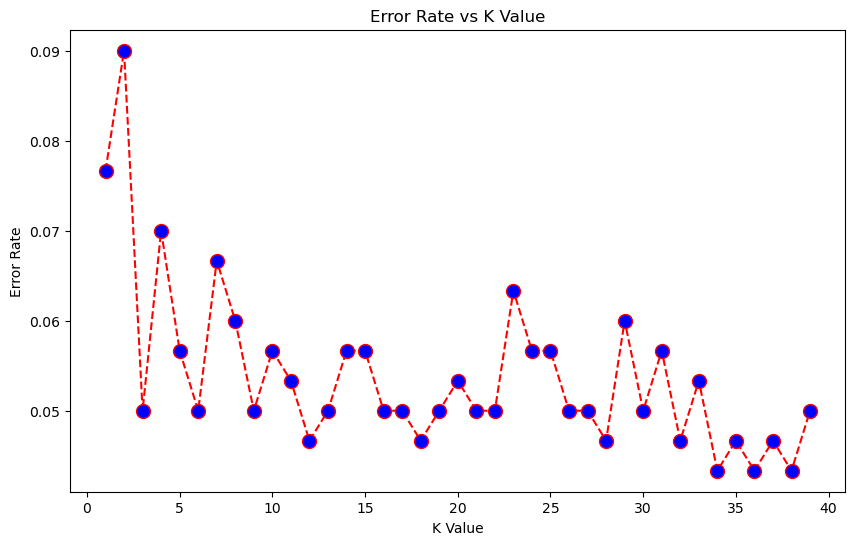

In [20]:
#Time to visually analyze K value vs Error Rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = "red", linestyle = "dashed", marker = "o", markerfacecolor = "blue", markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [21]:
#The lowest error rate seems to be at a K value of 34, 36, or 38. 
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
print(f'The model doesn''t seem to improve with a different k value. This is probably due to an already very low error rate. This KNN model exhibits robust performance metrics, revealing strong indication of accurate classification predictions within the dataset.')

The model doesnt seem to improve with a different k value. This is probably due to an already very low error rate. This KNN model exhibits robust performance metrics, revealing strong indication of accurate classification predictions within the dataset.
